In [52]:
from pandas import read_csv
import numpy as np
import pandas as pd
from scipy.stats import pointbiserialr, pearsonr
import matplotlib
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_samples, silhouette_score


In [53]:
#Código para cargar el Dataset
url = 'https://raw.githubusercontent.com/brubiog/TIA/main/dataset.csv'
dataset = read_csv(url,sep=";")

In [54]:
#Veamos las filas y columnas del dataset
dataset.shape

(4424, 37)

In [55]:
#Veamos qué tipo de información contiene
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Marital status                                  4424 non-null   int64 
 1   Application mode                                4424 non-null   int64 
 2   Application order                               4424 non-null   int64 
 3   Course                                          4424 non-null   int64 
 4   Daytime/evening attendance	                     4424 non-null   int64 
 5   Previous qualification                          4424 non-null   int64 
 6   Previous qualification (grade)                  4424 non-null   object
 7   Nacionality                                     4424 non-null   int64 
 8   Mother's qualification                          4424 non-null   int64 
 9   Father's qualification                          4424

In [56]:
#Vamos a ver las clases de cada una de nuestras variables object
print(dataset.groupby('Target').size())

Target
Dropout     1421
Enrolled     794
Graduate    2209
dtype: int64


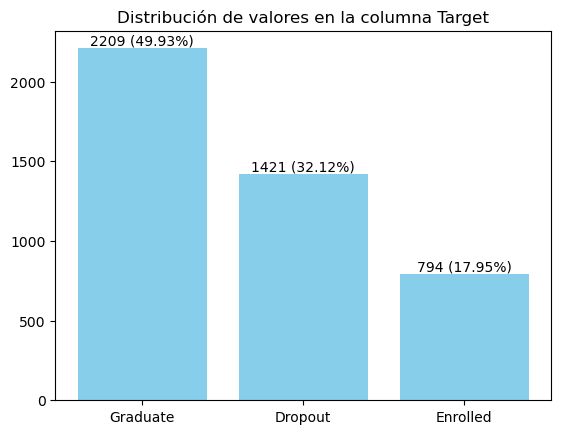

In [57]:
import matplotlib.pyplot as plt

# Datos de ejemplo
labels = ['Graduate', 'Dropout', 'Enrolled']
values = [2209, 1421, 794]
percentages = [49.93, 32.12, 17.95]

# Crear el gráfico de barras
fig, ax = plt.subplots()
bars = ax.bar(labels, values, color='skyblue')

# Añadir etiquetas a las barras
for bar, value, percentage in zip(bars, values, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            f'{value} ({percentage:.2f}%)',
            ha='center', va='bottom')

# Título y etiquetas de los ejes
ax.set_title('Distribución de valores en la columna Target')

# Mostrar el gráfico
plt.show()


In [60]:
#Transformamos los datos: convertimos las categorías a numéricas para poder modelar
from sklearn.preprocessing import LabelEncoder
data_mapped = {"Target": {"Dropout":0.0, "Graduate":1.0, "Enrolled":1.0}}
dataset=dataset.replace(data_mapped)
for column in dataset.columns:
    if dataset[column].dtype == 'object':
        try:
            dataset[column] = dataset[column].str.replace(',', '.').astype(float)
        except ValueError:
            le = LabelEncoder()
            dataset[column] = le.fit_transform(dataset[column])

# Verificar la conversión
print(dataset)



      Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                1             

In [61]:
#Vemos si hay nulos
dataset.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [62]:
#Veamos si hay registros duplicados
duplicados = dataset.duplicated()
numero_duplicados = duplicados.sum()
print("Número de registros duplicados:", numero_duplicados)

Número de registros duplicados: 0



## Gráficos

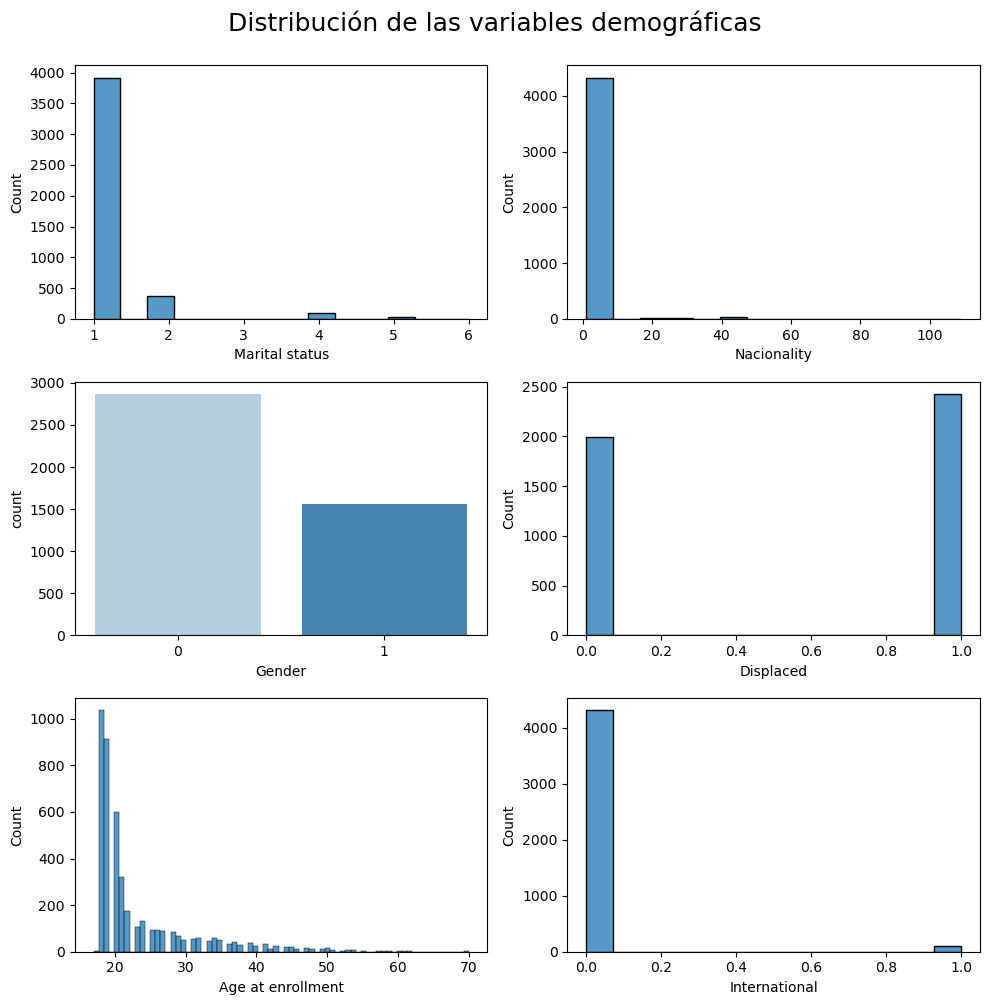

In [63]:
# DEMOGRÁFICAS

fig, axs = plt.subplots(3, 2, figsize=(10, 10))

sns.histplot(dataset['Marital status'], ax=axs[0, 0])
sns.histplot(dataset['Nacionality'], ax=axs[0, 1])
sns.countplot(x='Gender', data=dataset, ax=axs[1,0], palette='Blues')
sns.histplot(dataset['Displaced'], ax=axs[1, 1])
sns.histplot(dataset['Age at enrollment'], ax=axs[2,0])
sns.histplot(dataset['International'], ax=axs[2,1])

# Add title for the entire subplot
plt.suptitle('Distribución de las variables demográficas', fontsize=18, y=1)  # Adjust y position as needed

# Adjust layout and display plots
plt.tight_layout()
plt.show()

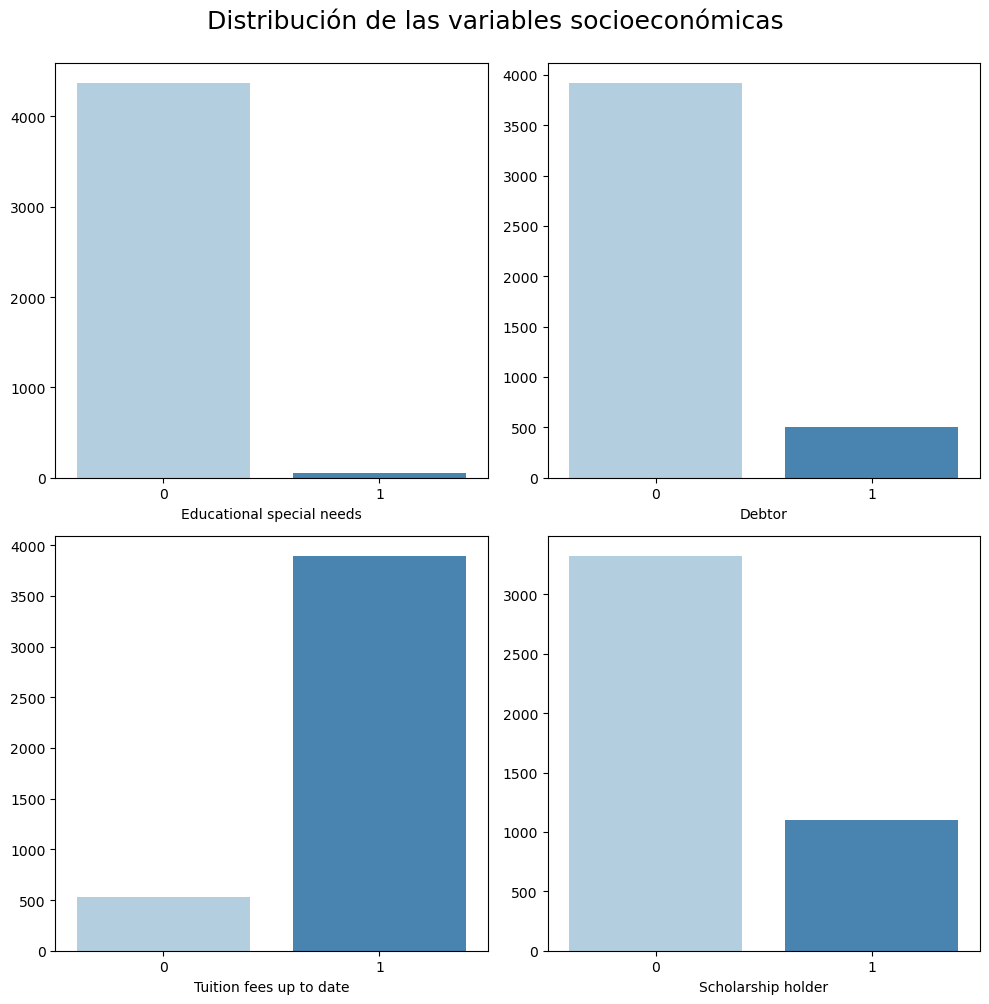

In [64]:
#SOCIOECONÓMICAS

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.countplot(x='Educational special needs', data=dataset, ax=axs[0,0], palette='Blues')
sns.countplot(x='Debtor', data=dataset, ax=axs[0,1], palette='Blues')
sns.countplot(x='Tuition fees up to date', data=dataset, ax=axs[1,0], palette='Blues')
sns.countplot(x='Scholarship holder', data=dataset, ax=axs[1,1], palette='Blues')


plt.suptitle('Distribución de las variables socioeconómicas', fontsize=18, y=1)  

for ax in axs.flat:
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

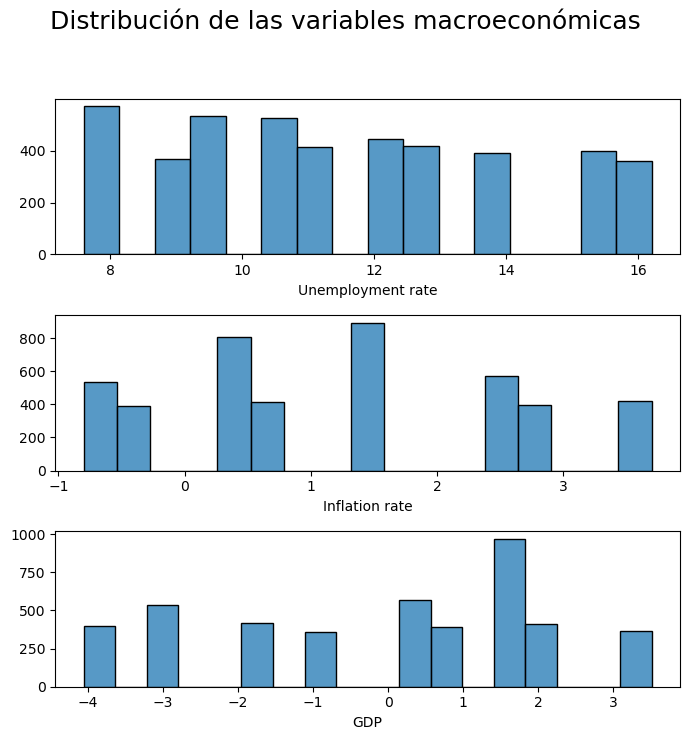

In [69]:
# MACROECONÓMICAS

fig, axs = plt.subplots(3, 1, figsize=(7, 7))  # Ajusta el tamaño si es necesario

sns.histplot(dataset['Unemployment rate'], ax=axs[0])
sns.histplot(dataset['Inflation rate'], ax=axs[1])
sns.histplot(dataset['GDP'], ax=axs[2])

for ax in axs.flat:
    ax.set_ylabel('')


plt.suptitle('Distribución de las variables macroeconómicas', fontsize=18, y=1.05)


plt.tight_layout()
plt.show()


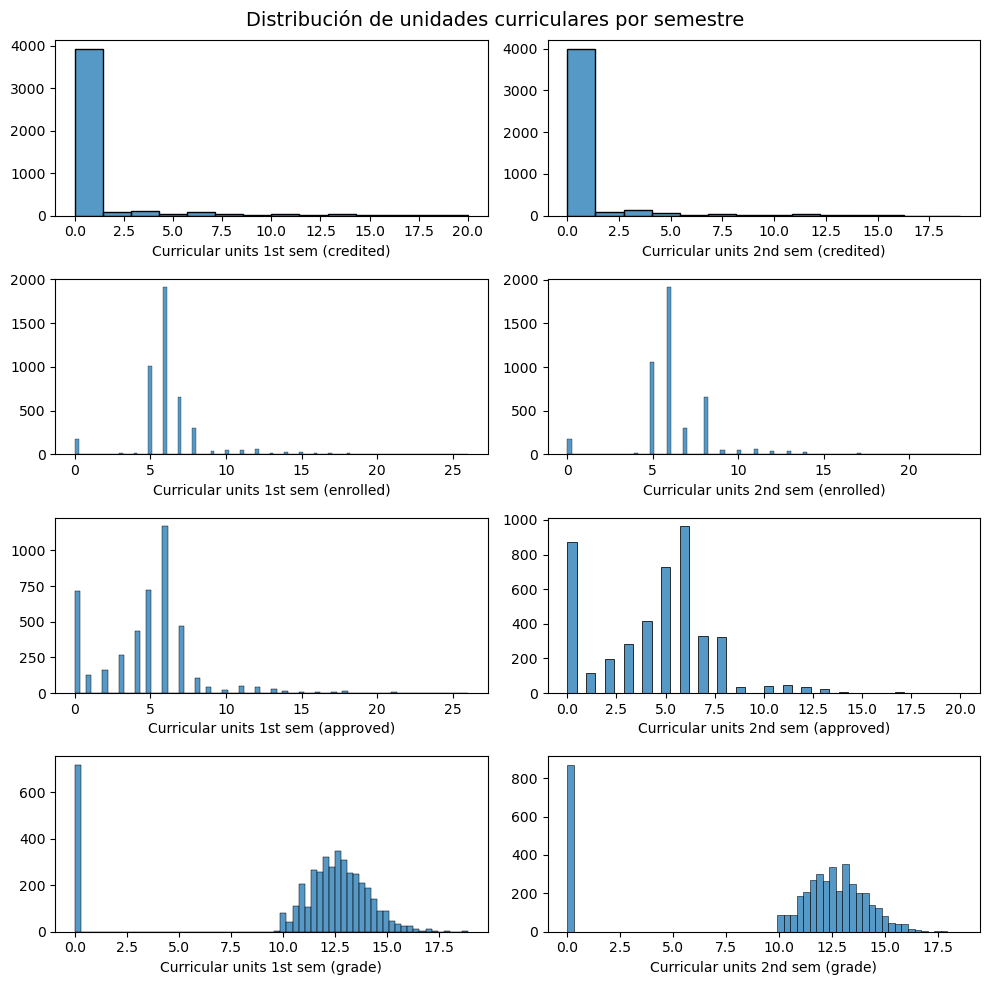

In [74]:
# ACADÉMICO POR SEMESTRE
fig, axs = plt.subplots(4, 2, figsize=(10, 10))  # Ajusta el tamaño si es necesario

sns.histplot(dataset['Curricular units 1st sem (credited)'], ax=axs[0,0])
sns.histplot(dataset['Curricular units 1st sem (enrolled)'], ax=axs[1,0])
sns.histplot(dataset['Curricular units 1st sem (approved)'], ax=axs[2,0])
sns.histplot(dataset['Curricular units 1st sem (grade)'], ax=axs[3,0])

sns.histplot(dataset['Curricular units 2nd sem (credited)'], ax=axs[0,1])
sns.histplot(dataset['Curricular units 2nd sem (enrolled)'], ax=axs[1,1])
sns.histplot(dataset['Curricular units 2nd sem (approved)'], ax=axs[2,1])
sns.histplot(dataset['Curricular units 2nd sem (grade)'], ax=axs[3,1])

for ax in axs.flat:
    ax.set_ylabel('')


plt.suptitle('Distribución de unidades curriculares por semestre', fontsize=14)


plt.tight_layout()
plt.show()

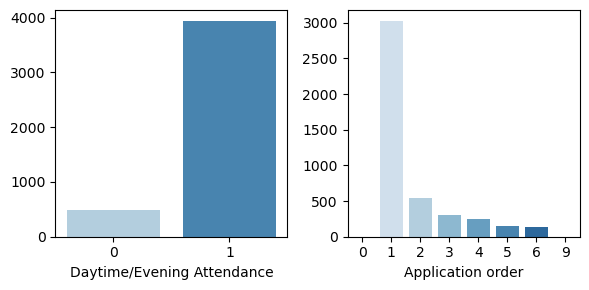

In [89]:
# MOMENTO DE INSCRIPCIÓN
fig, axs = plt.subplots(1, 2, figsize=(6,3))  # Ajusta el tamaño si es necesario

sns.countplot(x='Daytime/evening attendance\t', data=dataset, ax=axs[0], palette='Blues')
sns.countplot(x='Application order', data=dataset, ax=axs[1], palette='Blues')

for ax in axs.flat:
    ax.set_ylabel('')

axs[0].set_xlabel('Daytime/Evening Attendance')



plt.tight_layout()
plt.show()

In [91]:
# Estadisticos del dataset
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.00,1.00,6.00
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.00,39.00,57.00
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.00,2.00,9.00
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.00,9556.00,9991.00
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.00,1.00,1.00
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.00,1.00,43.00
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.10,140.00,190.00
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.00,1.00,109.00
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.00,37.00,44.00
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.00,37.00,44.00


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


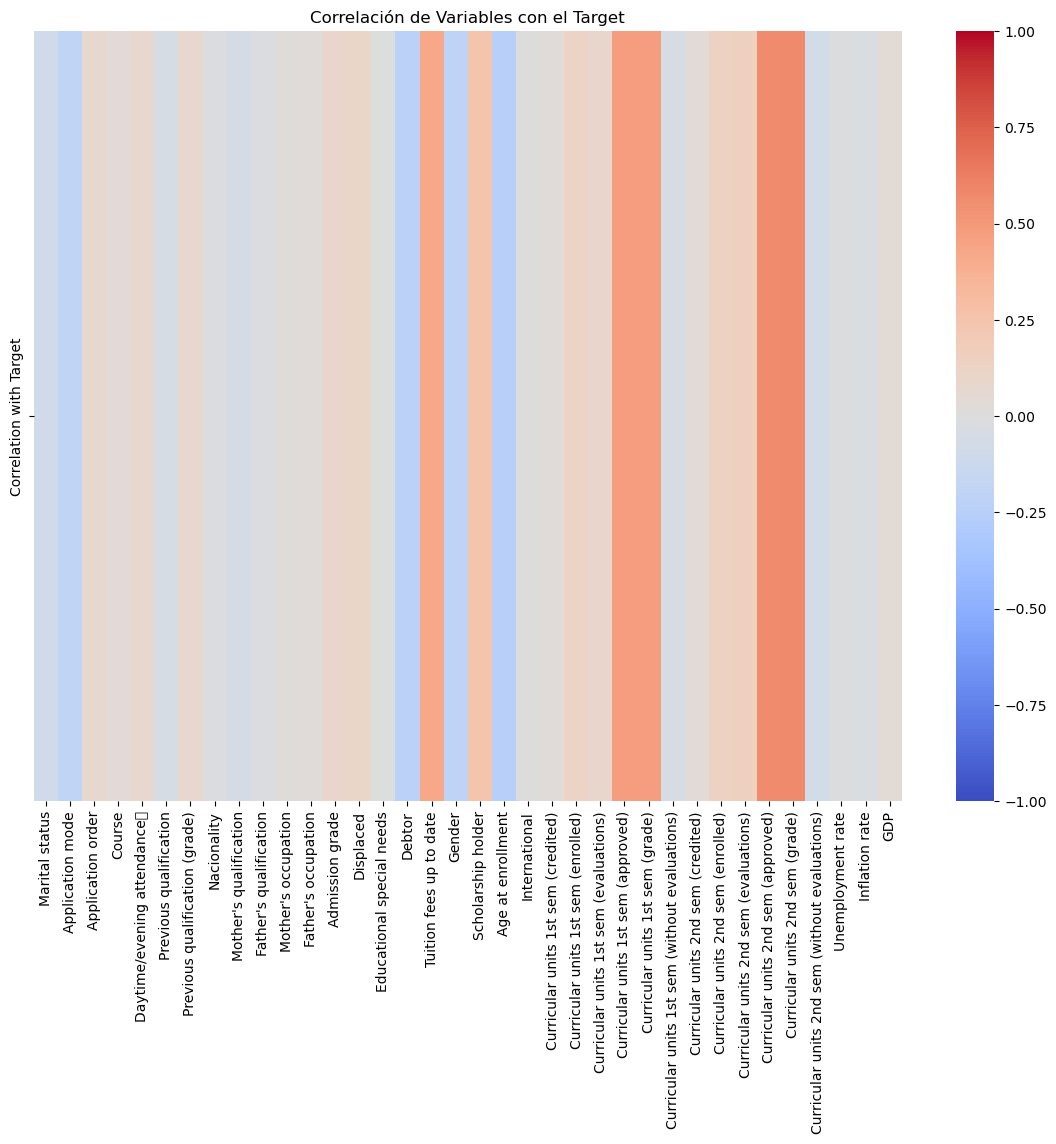

In [97]:
# CORRELACIONES DE LAS VARIABLES CON EL TARGET

# Vamos a calcular las correlaciones entre las variabes de entrada y la de salida
target = 'Target'
correlations = {}
for column in dataset.columns:
    if column != target:
        if pd.api.types.is_numeric_dtype(dataset[column]):
            try:
                corr, _ = pearsonr(dataset[column].astype(float), dataset[target].astype(float))
                correlations[column] = corr
            except Exception as e:
                print(f"Error calculating correlation for {column}: {e}")
# Convertir a un DataFrame para mejor visualización
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation with Target'])
# Filtrar valores NaN
correlation_df = correlation_df.dropna()
#print(correlation_df)

# Ordenar las correlaciones de mayor a menor
correlation_df_sorted = correlation_df.sort_values(by='Correlation with Target', ascending=False)

#print(correlation_df_sorted)


# Crear el mapa de calor
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_df.T, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación de Variables con el Target')
plt.show()
